In [1]:
import pandas as pd
import numpy as np
from sklearn.pipeline import make_pipeline, Pipeline
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import pyplot
from scipy.stats import norm, boxcox
sns.set()
import import_ipynb
from Helpers import *

importing Jupyter notebook from Helpers.ipynb


In [2]:
df = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
ct = CategoryTransformer(column='MSSubClass', keys=[ 20,  30,  40,  45,  50,  60,  70,  75,  80,  85,  90, 120, 150, 160, 180, 190])
pp = Pipeline(
    [('MSSubClassToCategory', ct)])

df = pp.fit_transform(df)

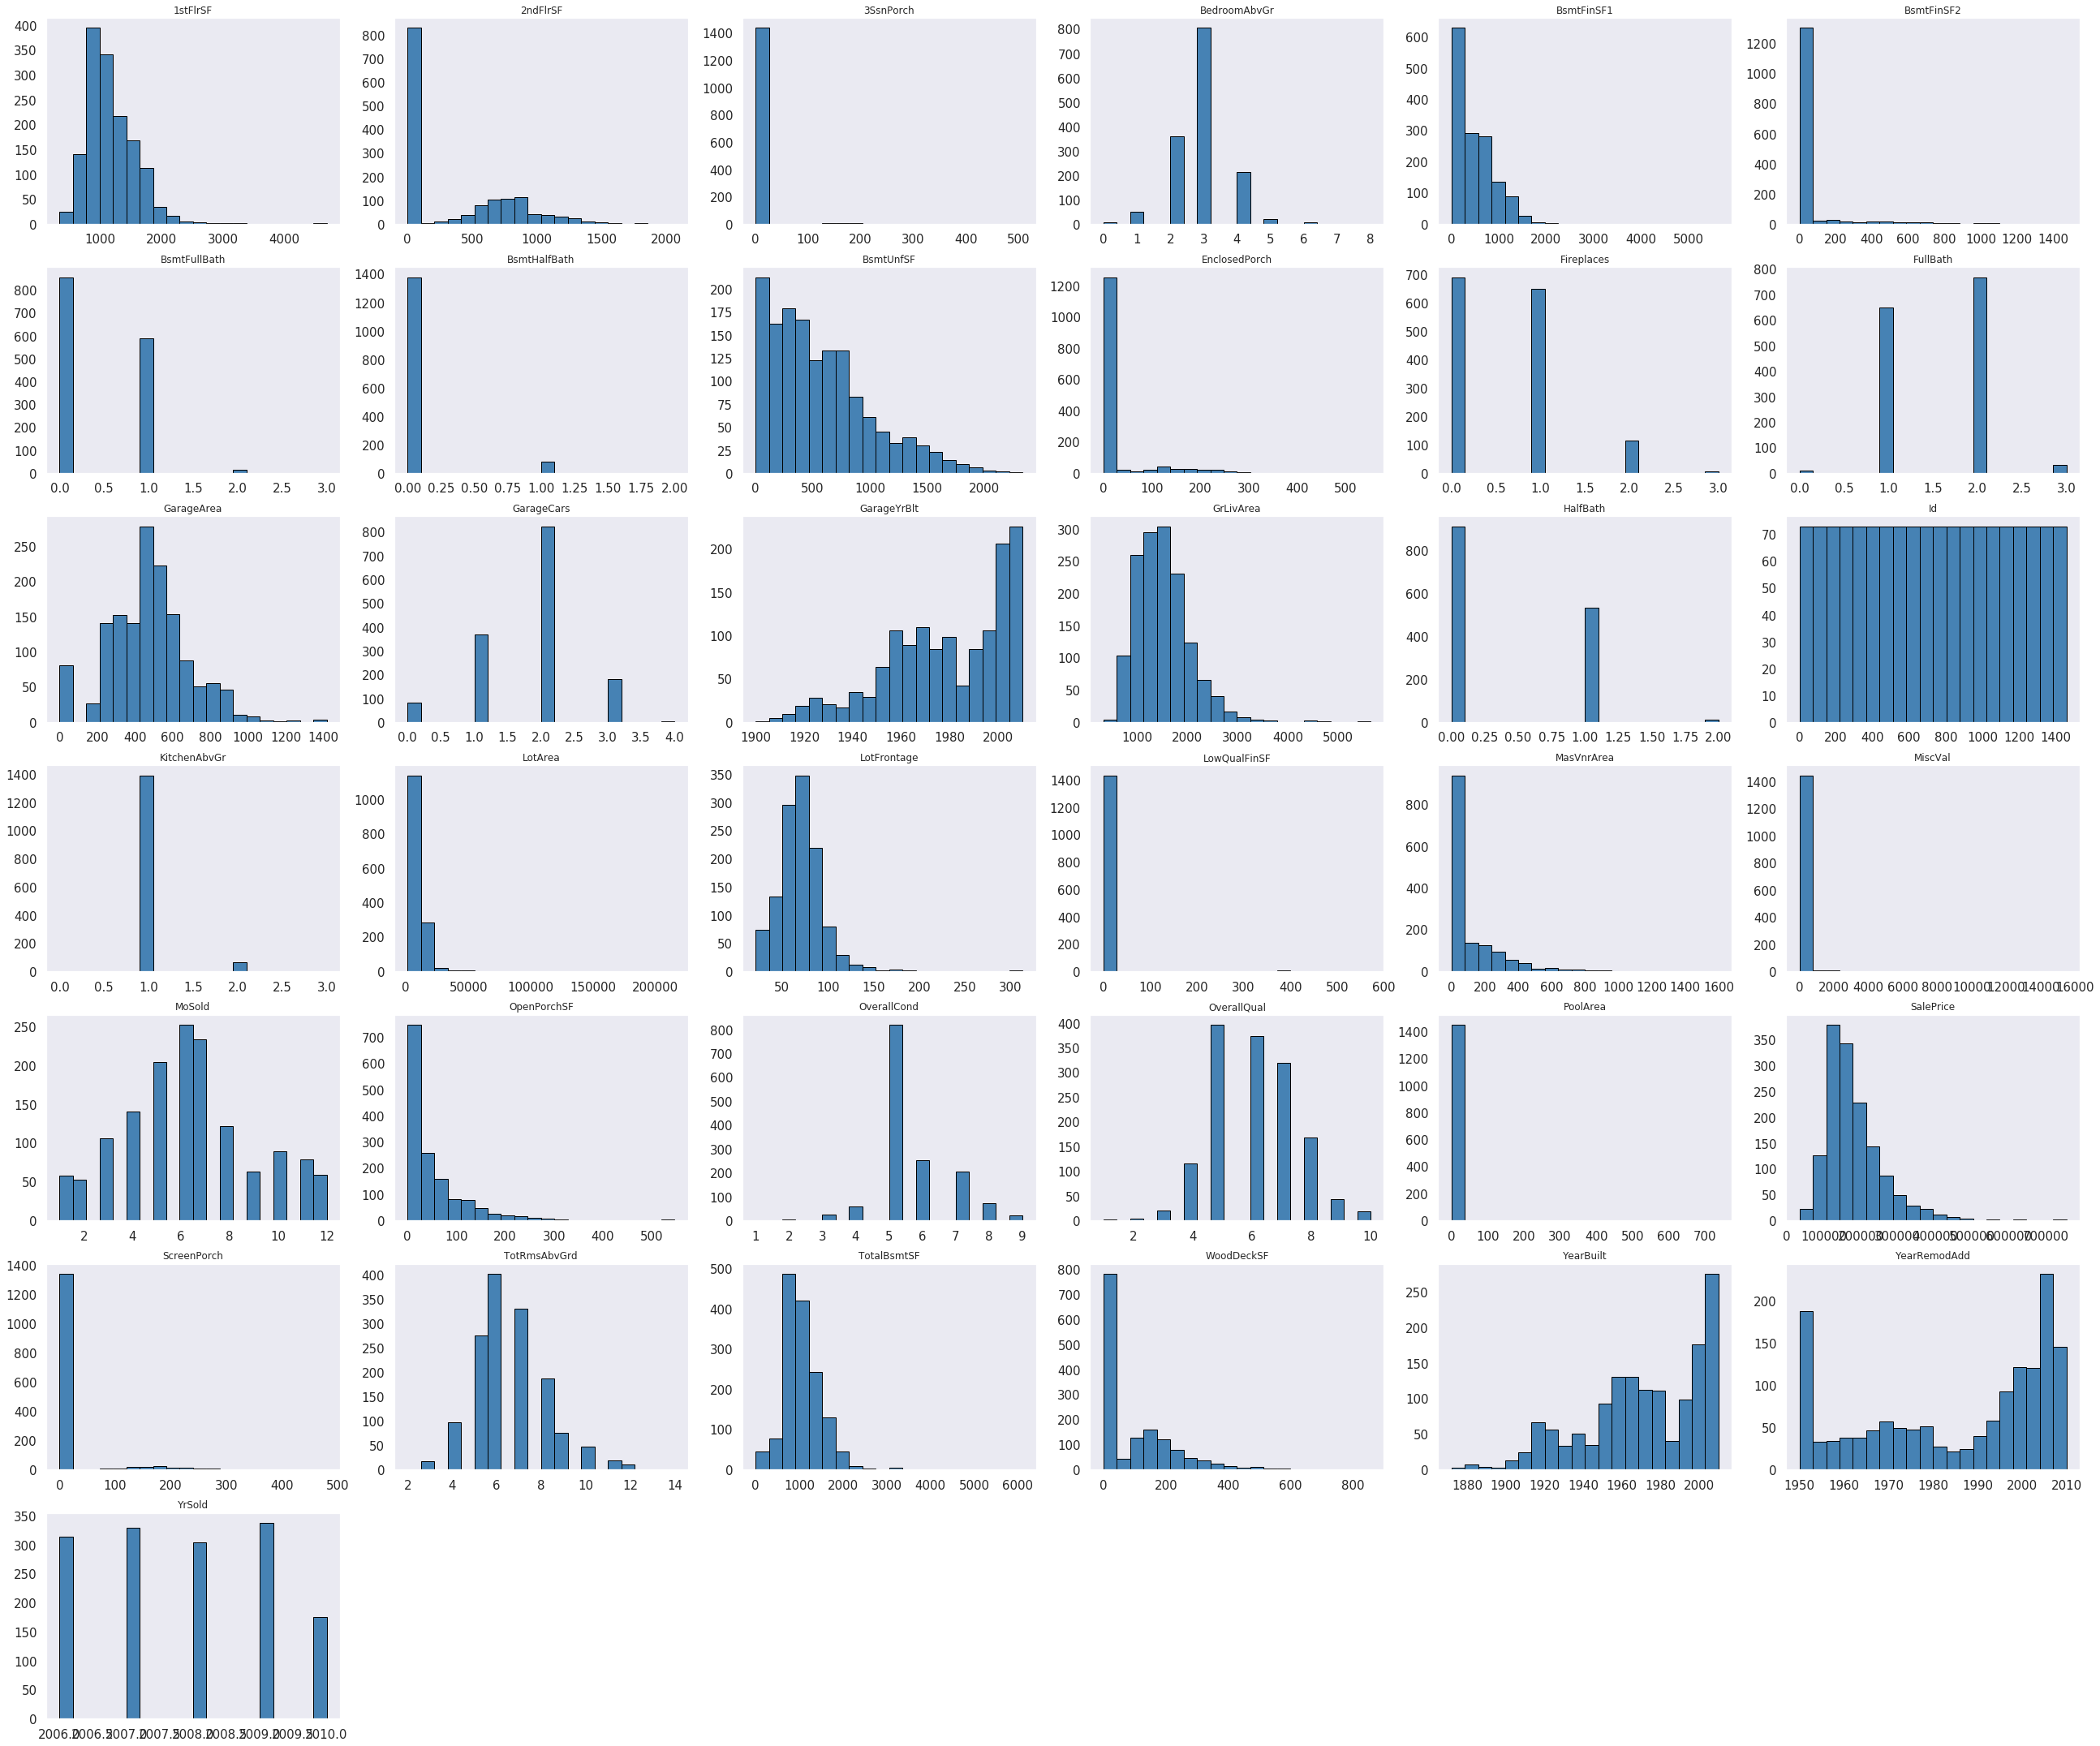

In [4]:
df.hist(bins=20, color='steelblue', edgecolor='black', linewidth=1.0,
           xlabelsize=15, ylabelsize=15, grid=False, figsize = (30,25))    
plt.tight_layout(rect=(0, 0, 1.2, 1.2))  

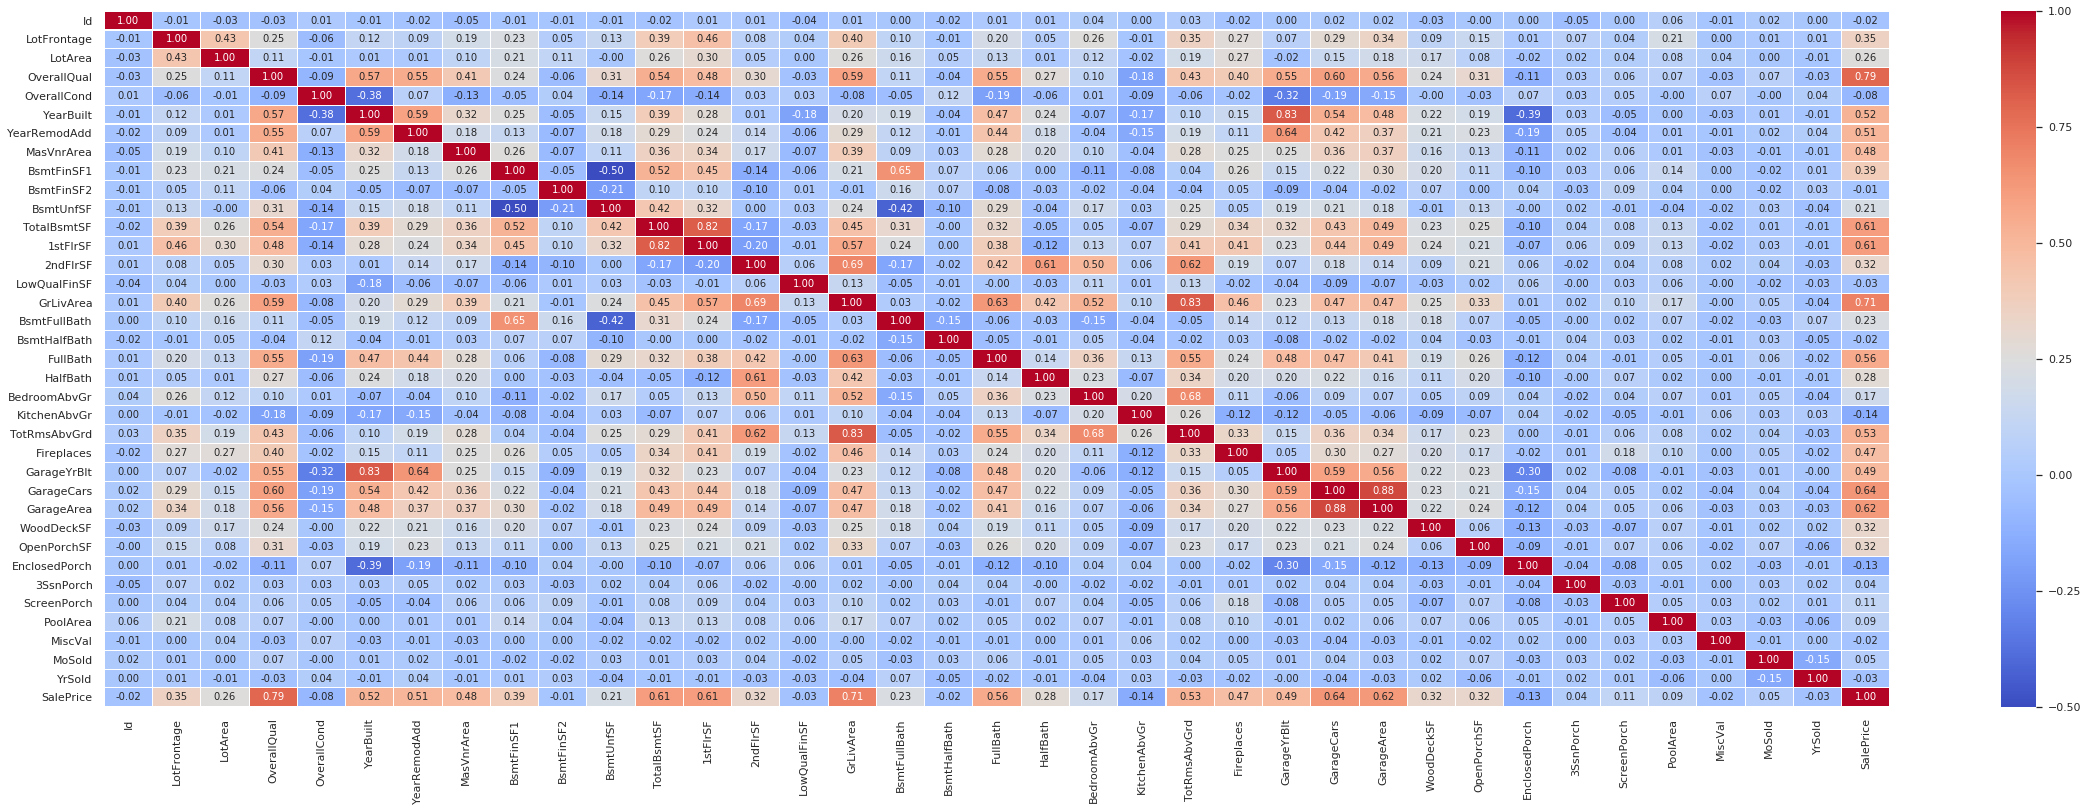

In [5]:
f, ax = plt.subplots(figsize=(40, 12))
corr = df.corr()
hm = sns.heatmap(round(corr,2), annot=True, ax=ax, cmap="coolwarm",fmt='.2f',
                 linewidths=.05)
f.subplots_adjust(top=0.93)

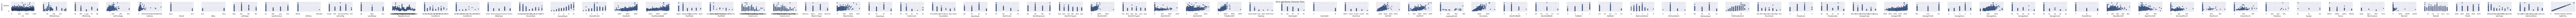

In [6]:
pp = sns.pairplot(df, height=1.8, aspect=1.8,  y_vars=['SalePrice'], x_vars=df.columns,
                  plot_kws=dict(edgecolor="k", linewidth=0.5),
                  diag_kind="kde", diag_kws=dict(shade=True))

fig = pp.fig 
fig.subplots_adjust(top=0.93, wspace=0.3)
t = fig.suptitle('Wine Attributes Pairwise Plots', fontsize=14)

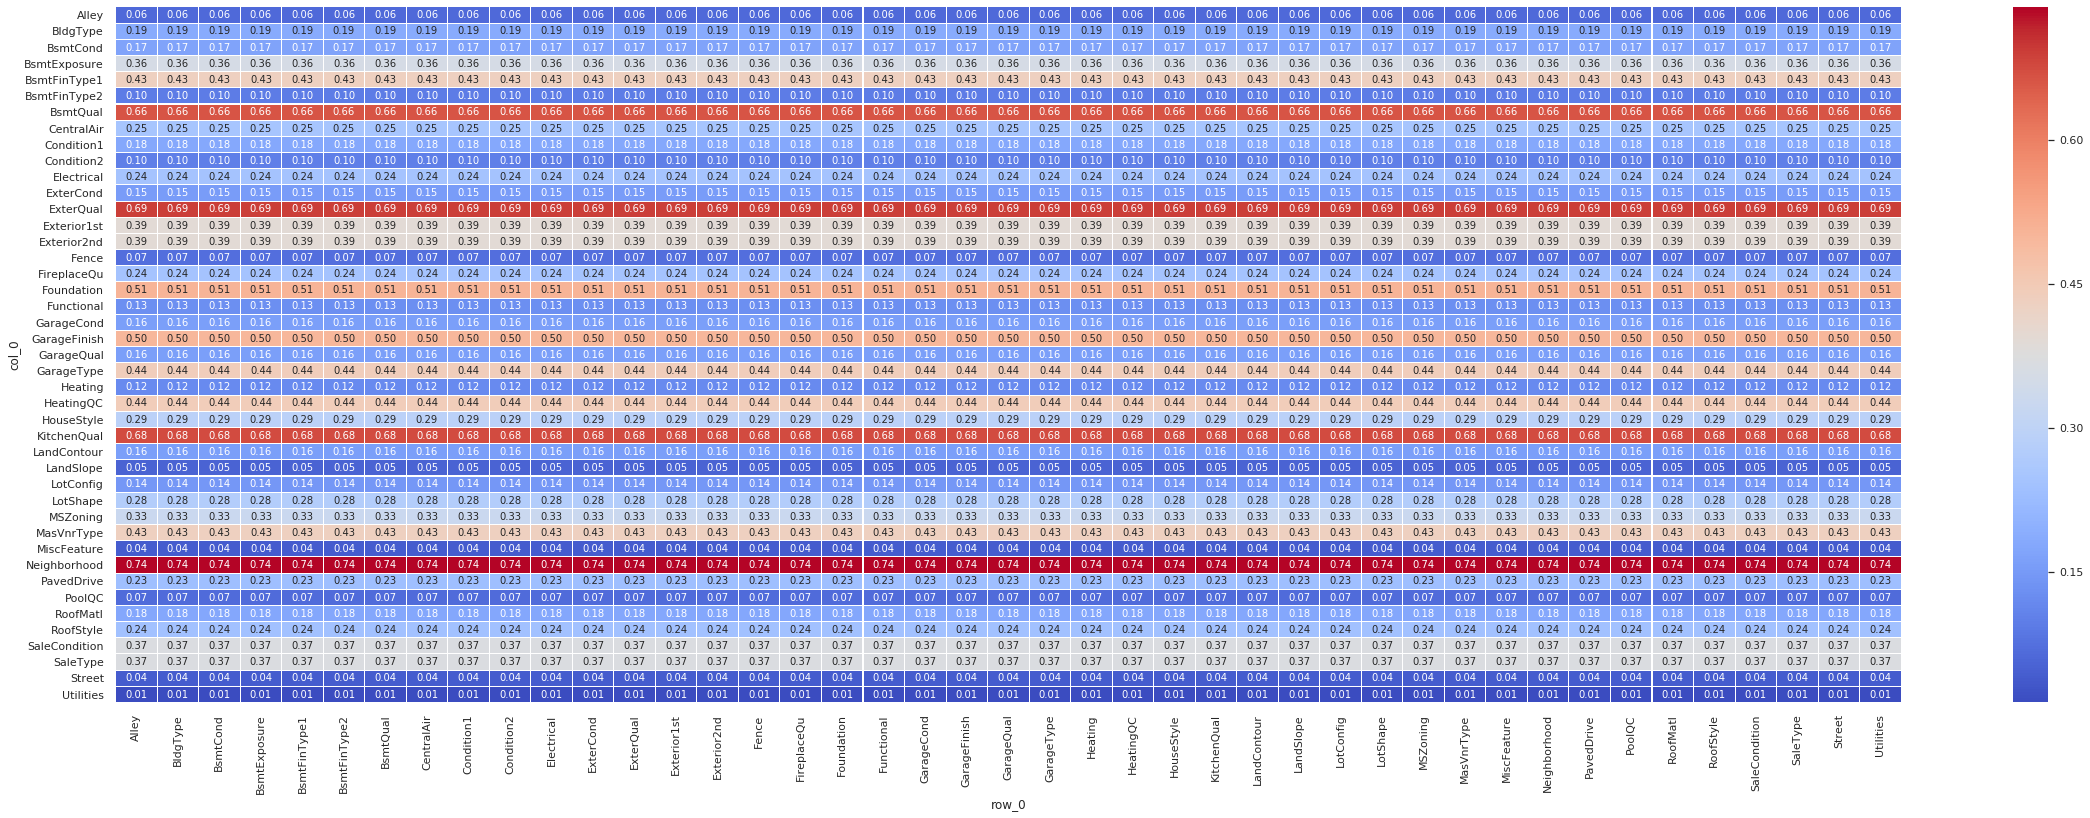

In [28]:

f, ax = plt.subplots(figsize=(40, 12))


cols=df.columns[df.dtypes=='object'] 
objdf = pd.crosstab(cols,cols)


for c1 in cols:
#      for c2 in cols:     
        objdf[c1] = correlation_ratio(df[c1], df.SalePrice)
        
# print(objdf)
hm = sns.heatmap(objdf.T, annot=True, ax=ax, cmap="coolwarm",fmt='.2f',
                 linewidths=.05, linecolor='white')
f.subplots_adjust(top=0.93)

In [8]:
for col in df.columns[df.dtypes==object]:
    print(col, correlation_ratio(df[col], df.SalePrice))

MSZoning 0.3279629299879021
Street 0.041035535500049534
Alley 0.06457085453950956
LotShape 0.2763615521925143
LandContour 0.16060537183203935
Utilities 0.014314296147248773
LotConfig 0.1449805660703004
LandSlope 0.051784414298815404
Neighborhood 0.7386304832658636
Condition1 0.1806395304453634
Condition2 0.09949452606283138
BldgType 0.18583333094140705
HouseStyle 0.2937901075671953
RoofStyle 0.2402012284068327
RoofMatl 0.17723747640844897
Exterior1st 0.3908620257099605
Exterior2nd 0.39221149922589343
MasVnrType 0.43141939577551675
ExterQual 0.6909325420958304
ExterCond 0.15368025465904525
Foundation 0.5063283534727419
BsmtQual 0.6643560485989788
BsmtCond 0.16739777086955362
BsmtExposure 0.3561664767102167
BsmtFinType1 0.43282775446942623
BsmtFinType2 0.09583428452678527
Heating 0.12015463131446785
HeatingQC 0.442154368790011
CentralAir 0.251328163840155
Electrical 0.2442782910813044
KitchenQual 0.6757208184187744
Functional 0.128375954607555
FireplaceQu 0.24373769613854065
GarageType 0

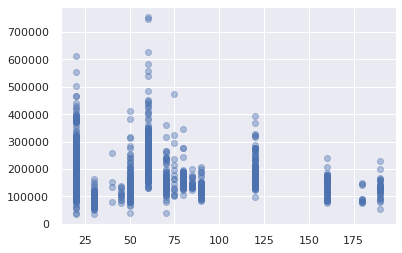

In [9]:

plt.scatter(df['MSSubClass'], df['SalePrice'],alpha=0.4 )
plt.show()

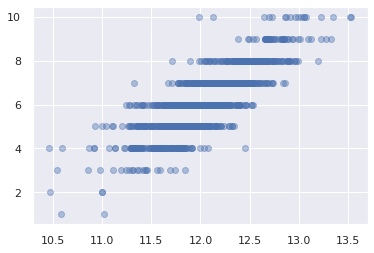

In [10]:
plt.scatter( np.log(df['SalePrice']),df['OverallQual'],alpha=0.4 )
plt.show()

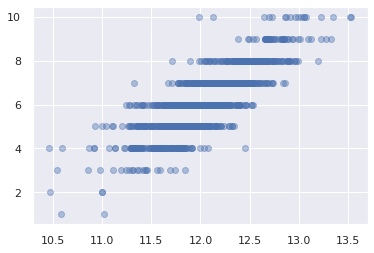

In [11]:
plt.scatter( np.log(df['SalePrice']),df['OverallQual'],alpha=0.4 )
plt.show()

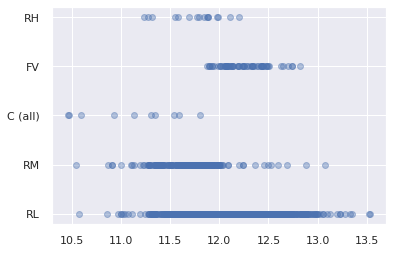

In [12]:
plt.scatter( np.log(df['SalePrice']),df['MSZoning'],alpha=0.4 )
plt.show()

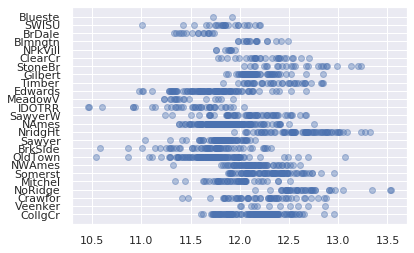

In [13]:
plt.scatter( np.log(df['SalePrice']),df['Neighborhood'],alpha=0.4 )
plt.show()

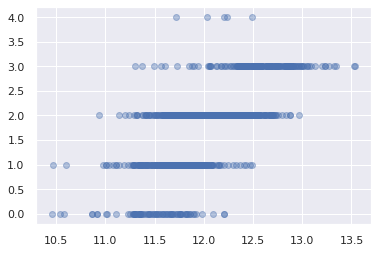

In [14]:
plt.scatter( np.log(df['SalePrice']),df['GarageCars'],alpha=0.4 )
plt.show()

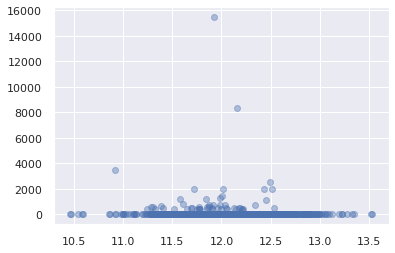

In [15]:
plt.scatter( np.log(df['SalePrice']),df['MiscVal'],alpha=0.4 )
plt.show()

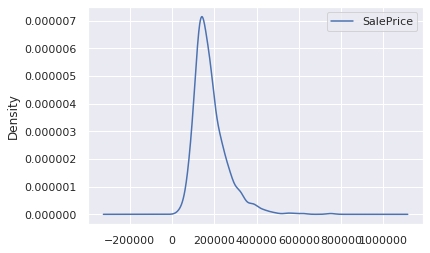

In [16]:
df.plot.kde(x='Id', y='SalePrice')

-0.07692396374428875


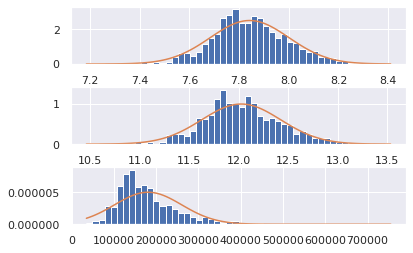

In [17]:
#plt.figure(1)

fig, (ax1, ax2,ax3) = plt.subplots(3)
fig.subplots_adjust(hspace=0.4, wspace=0.4)
data, lambd = boxcox(df['SalePrice'])
data2 = np.log(df['SalePrice'])
data3 = (df['SalePrice'])
print(lambd)
ax1.hist(data, density=True, bins=50)
ax2.hist(data2, density=True, bins=50)
ax3.hist(data3, density=True, bins=50)
#ax1.xlim((min(data), max(data)))

mean = np.mean(data)
variance = np.var(data)
sigma = np.sqrt(variance)
x = np.linspace(min(data), max(data), 100)
ax1.plot(x, norm.pdf(x, mean, sigma))

mean2 = np.mean(data2)
variance2 = np.var(data2)
sigma2 = np.sqrt(variance2)
x2 = np.linspace(min(data2), max(data2), 100)
ax2.plot(x2, norm.pdf(x2, mean2, sigma2))

mean3 = np.mean(data3)
variance3 = np.var(data3)
sigma3 = np.sqrt(variance3)
x3 = np.linspace(min(data3), max(data3), 100)
ax3.plot(x3, norm.pdf(x3, mean3, sigma3))

plt.show()

In [18]:
np.sort(df['MSSubClass'].unique())

array([ 20,  30,  40,  45,  50,  60,  70,  75,  80,  85,  90, 120, 160,
       180, 190])

0.24086104791215338


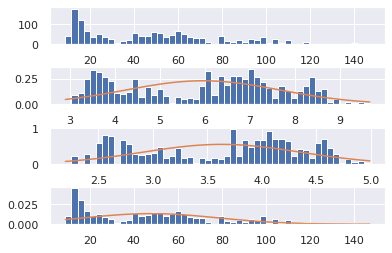

In [19]:
#plt.figure(1)
column = 'YearBuilt'
data=2019-df[column]
fig, (ax0, ax1, ax2,ax3) = plt.subplots(4)
fig.subplots_adjust(hspace=0.6, wspace=0.6)
data1, lambd = boxcox(data)
data2 = np.log(data)
data3 = (data)
print(lambd)

ax0.hist(data,  bins=50)

ax1.hist(data1, density=True, bins=50)
ax2.hist(data2, density=True, bins=50)
ax3.hist(data3, density=True, bins=50)
#ax1.xlim((min(data), max(data)))

mean = np.mean(data1)
variance = np.var(data1)
sigma = np.sqrt(variance)
x = np.linspace(min(data1), max(data1), 100)
ax1.plot(x, norm.pdf(x, mean, sigma))

mean2 = np.mean(data2)
variance2 = np.var(data2)
sigma2 = np.sqrt(variance2)
x2 = np.linspace(min(data2), max(data2), 100)
ax2.plot(x2, norm.pdf(x2, mean2, sigma2))

mean3 = np.mean(data3)
variance3 = np.var(data3)
sigma3 = np.sqrt(variance3)
x3 = np.linspace(min(data3), max(data3), 100)
ax3.plot(x3, norm.pdf(x3, mean3, sigma3))

plt.show()

In [20]:
df.isnull().sum()


Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

In [21]:
print(test['PoolQC'].unique())
print(df['PoolQC'].unique())

[nan 'Ex' 'Gd']
[nan 'Ex' 'Fa' 'Gd']


In [22]:
test['SaleType'].isnull().sum()

1

In [23]:
test['PoolQC'].isnull()

0        True
1        True
2        True
3        True
4        True
5        True
6        True
7        True
8        True
9        True
10       True
11       True
12       True
13       True
14       True
15       True
16       True
17       True
18       True
19       True
20       True
21       True
22       True
23       True
24       True
25       True
26       True
27       True
28       True
29       True
30       True
31       True
32       True
33       True
34       True
35       True
36       True
37       True
38       True
39       True
40       True
41       True
42       True
43       True
44       True
45       True
46       True
47       True
48       True
49       True
50       True
51       True
52       True
53       True
54       True
55       True
56       True
57       True
58       True
59       True
60       True
61       True
62       True
63       True
64       True
65       True
66       True
67       True
68       True
69       True
70       True
71    

In [24]:
5 is None


False

In [25]:
!git push

Everything up-to-date
